In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv("Popular_Spotify_Songs.csv", encoding="latin1")

df = df.drop(['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 
              'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_charts', 
              'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts','in_apple_playlists', 
              'mode', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 
              'bpm', 'danceability_%', 'valence_%', 'energy_%'], axis=1)
df




,streams,key
0,141381703,B
1,133716286,C#
2,140003974,F
3,800840817,A
4,303236322,A
...,...,...
948,91473363,A
949,121871870,F#
950,73513683,C#
951,133895612,C#


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13608\3036813122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['streams'] = pd.to_numeric(df['streams'])


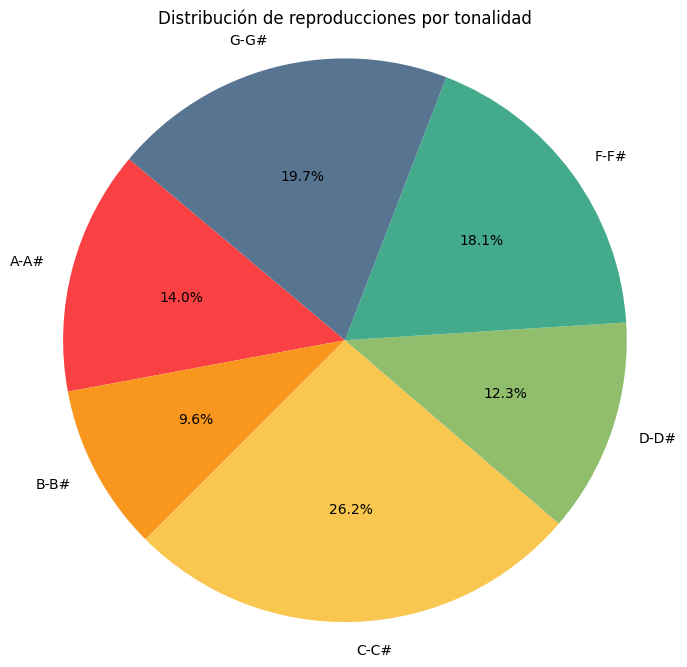

In [8]:
try:
    df['streams'] = pd.to_numeric(df['streams'])
except ValueError:
    df = df[df['streams'].apply(lambda x: x.isnumeric())]

# Función para agrupar las claves musicales
def group_keys(key):
    if key in ['A', 'A#']:
        return 'A-A#'
    elif key in ['G', 'G#']:
        return 'G-G#'
    elif key in ['B', 'B#']:
        return 'B-B#'
    elif key in ['F', 'F#']:
        return 'F-F#'
    elif key in ['E', 'D#']:
        return 'D-D#'
    elif key in ['D', 'C#']:
        return 'C-C#'
    else:
        return key

# Crear una copia del DataFrame
df_copy = df.copy()

# Aplicar la función de agrupación a la columna 'key'
df_copy['key'] = df_copy['key'].apply(group_keys)

# Agrupar por clave musical y calcular la suma de los streams
grouped = df_copy.groupby('key').sum()

# Colores personalizados para cada sección del gráfico
colors = ['#F94144', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590']

# Crear el gráfico circular (pie chart)
plt.figure(figsize=(8, 8))
plt.pie(grouped['streams'], labels=grouped.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of reproductions by key')
plt.show()